**정형데이터 실습**

1. 데이터 탐색
    * 기초통계량
    * 시각화
    * 이변량 데이터

2. 회귀모형
    * 선형 회귀모형

3. 분류모형
    * K-nearest neighborhood
    * 의사결정나무
---

### 1. 데이터 탐색: iris 데이터

In [1]:
# 아래 모듈이 설치되어 있지 않은 경우 설치합니다.
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

In [2]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 데이터프레임으로 변환
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# target도 데이터프레임 열로 구성하기
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['species'])

In [8]:
print(iris_df['petal length (cm)'].mean())

# 기초통계량을 종합적으로 확인
iris_df.describe()

3.7580000000000005


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# 그룹화
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['species'])

iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [10]:
# 클래스값 바꾸기
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(class_mapping)

In [11]:
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
# 집계: 그룹별 기초통계량 산출
iris_df.groupby('species').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

2. 시각화

    * 범주형 변수: 빈도표, bar plot, pie chart
    * 연속형 변수: 히스토그램

In [13]:
# 범주형 변수
# 1. 빈도표
iris_table = iris_df['species'].value_counts()
iris_table

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

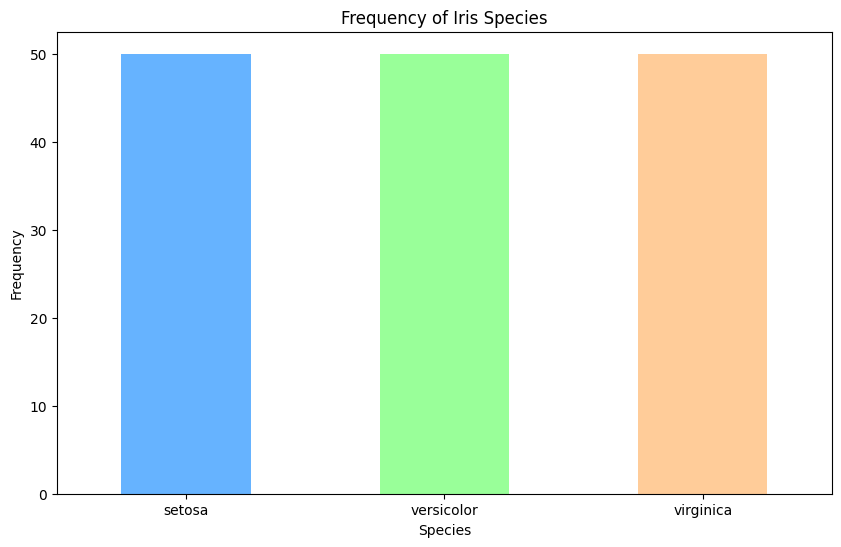

In [15]:
import matplotlib.pyplot as plt

# 범주형 변수
# 2. bar plot
plt.figure(figsize=(10, 6))
iris_table.plot(kind='bar', color=['#66b3ff','#99ff99','#ffcc99'])
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Iris Species')
plt.xticks(rotation=0)
plt.show()

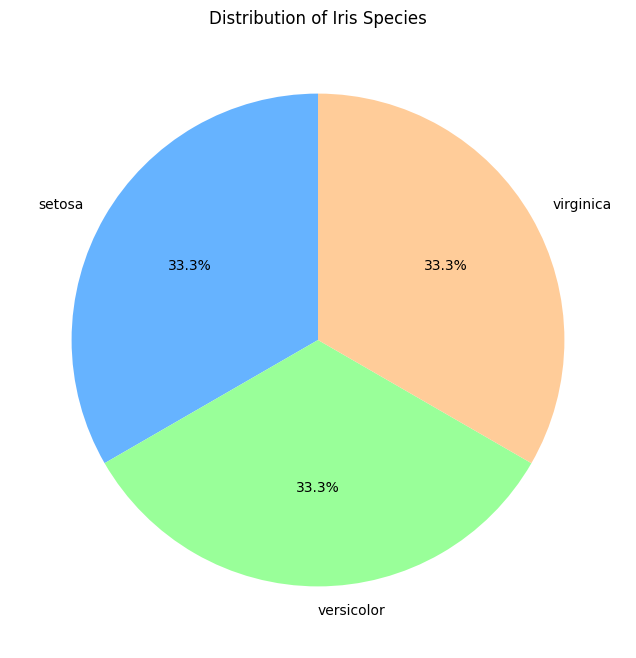

In [16]:
# 범주형 변수
# 3. pie chart

plt.figure(figsize=(8, 8))
plt.pie(iris_table, labels=iris_table.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Iris Species')
plt.show()

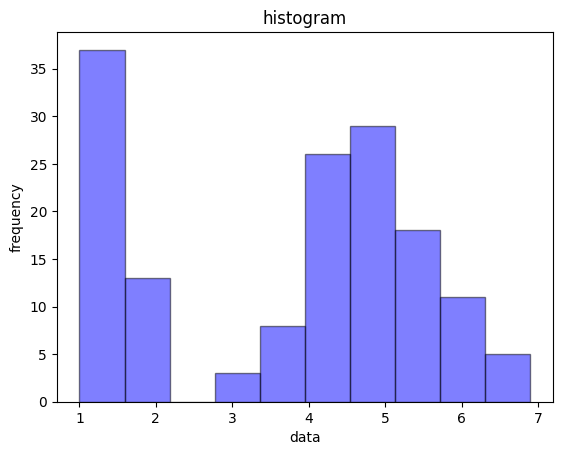

In [17]:
# 연속형 변수: 히스토그램 그리기
import matplotlib.pyplot as plt

plt.hist(iris_df['petal length (cm)'], bins=10, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel('data')
plt.ylabel('frequency')
plt.title('histogram')

# 그래프 보이기
plt.show()


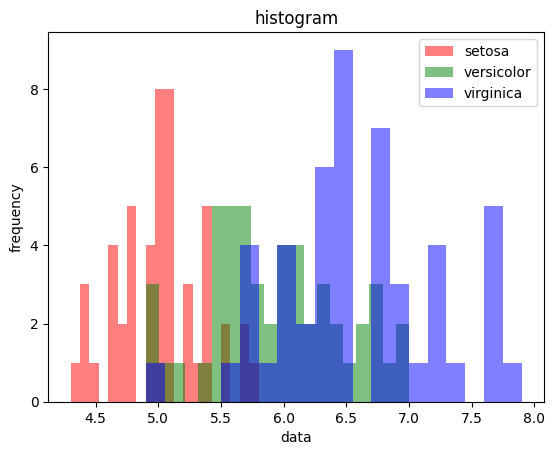

In [18]:
# 라벨 별로 히스토그램 그리기

# 각 품종에 대한 데이터 추출
setosa_data = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_data = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_data = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# 히스토그램 그리기
plt.hist(setosa_data, bins=20, alpha=0.5, label='setosa', color='r')
plt.hist(versicolor_data, bins=20, alpha=0.5, label='versicolor', color='g')
plt.hist(virginica_data, bins=20, alpha=0.5, label='virginica', color='b')

# 라벨과 범례 추가
plt.xlabel('data')
plt.ylabel('frequency')
plt.title('histogram')
plt.legend()

# 그래프 보이기
plt.show()


* 이변량 데이터

Text(0, 0.5, 'petal width (cm)')

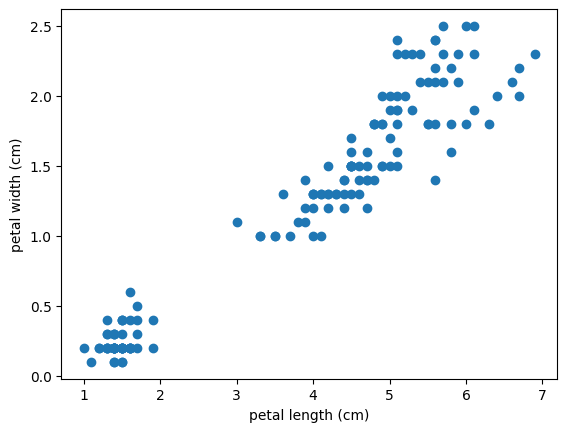

In [19]:
# 산점도 그리기
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], label='scatter plot')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

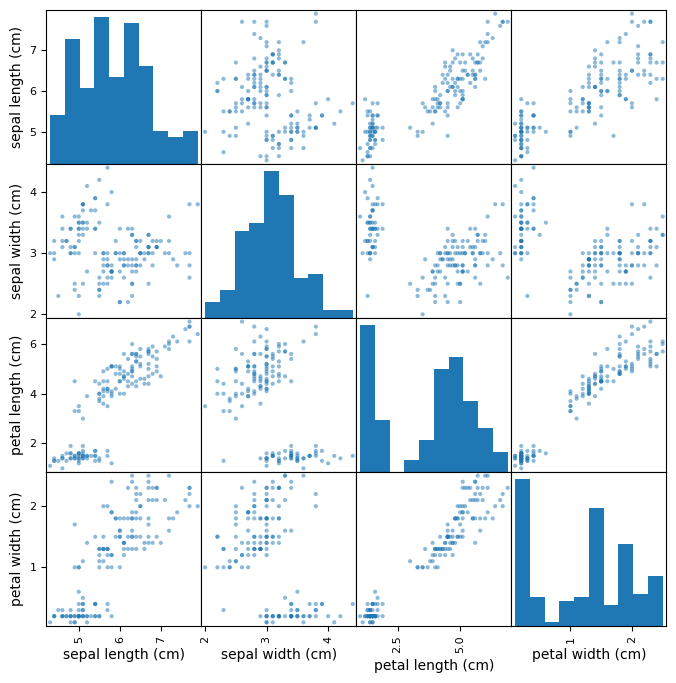

In [20]:
# 모든 변수의 산점도를 그려보자
pd.plotting.scatter_matrix(iris_df,
                           figsize=(8, 8),
                           diagonal='hist',
                        #    color=colors
                           )

# 옵션
# color_palette = {'setosa': "#0392cf", 
#                  'virginica': "#7bc043", 
#                  'versicolor': "#ee4035"}
# colors = iris_df["species"].map(lambda x: color_palette.get(x))

In [21]:
# 상관계수
iris_df.iloc[:, 0:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### 2. 회귀모형

* 선형회귀모형

In [22]:
from sklearn.linear_model import LinearRegression

# prepare data
X = iris.data[:, 2].reshape(-1, 1)
y = iris.data[:, 3]

In [23]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("training 데이터의 크기 :", X_train.shape)
print("test 데이터의 크기 :", X_test.shape)

training 데이터의 크기 : (105, 1)
test 데이터의 크기 : (45, 1)


In [24]:
# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련 (데이터에 적합)
model.fit(X_train, y_train)

LinearRegression()

In [49]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.41329724]),
 'rank_': 1,
 'singular_': array([17.5544432]),
 'intercept_': -0.3606095070439961}

In [50]:
# 회귀 계수 확인
coefficients = model.coef_
intercept = model.intercept_

print("절편 (intercept):", intercept)
print("회귀 계수 (가중치):", coefficients)

절편 (intercept): -0.3606095070439961
회귀 계수 (가중치): [0.41329724]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


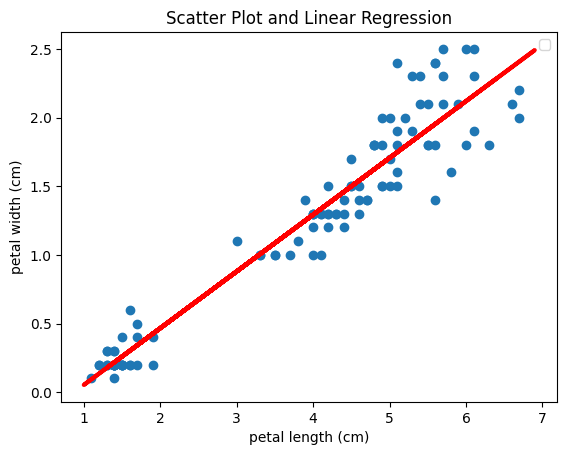

In [25]:
# 회귀선 그리기
plt.scatter(X_train, y_train)
plt.plot(X_test, model.predict(X_test.reshape(-1, 1)), color='red', linewidth=3)

plt.legend()
plt.title('Scatter Plot and Linear Regression')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [60]:
# 독립변수를 여러 개 넣어보자
X = iris.data[:, 0:3]
y = iris.data[:, 3]

print("독립변수:", X)
print("종속변수", y)

독립변수: [[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.

In [61]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("training 데이터의 크기 :", X_train.shape)
print("test 데이터의 크기 :", X_test.shape)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련 (데이터에 적합)
model.fit(X_train, y_train)

# 회귀 계수 확인
coefficients = model.coef_
intercept = model.intercept_

print("절편 (intercept):", intercept)
print("회귀 계수 (가중치):", coefficients)

training 데이터의 크기 : (105, 3)
test 데이터의 크기 : (45, 3)
절편 (intercept): -0.16560909133062585
회귀 계수 (가중치): [-0.25113971  0.25971605  0.54009078]


### 3. 분류모형

* KNN

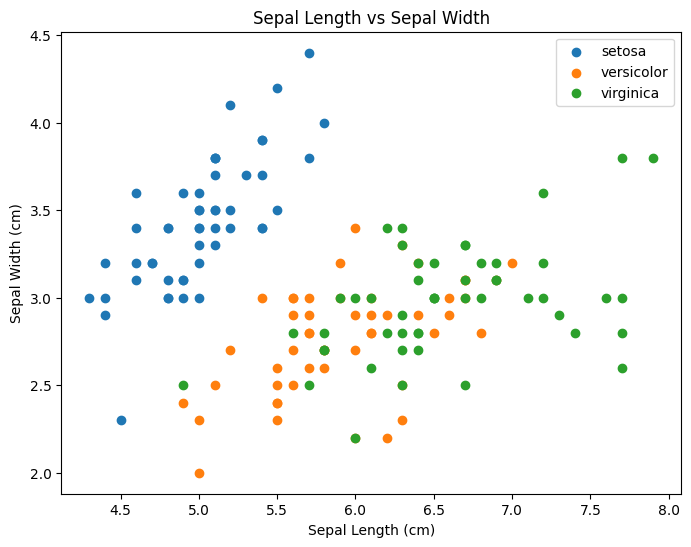

In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 모듈을 import

iris = load_iris()
# prepare data
X = iris.data[:, :2]
y = iris.target

# 데이터 그룹별로 나누기
classes = list(set(y))  # 고유한 클래스 값 추출

plt.figure(figsize=(8, 6))

for cls in classes:
    indices = y == cls  # 현재 클래스에 해당하는 인덱스 선택
    plt.scatter(X[indices, 0], X[indices, 1], label=iris.target_names[cls])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()


In [27]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 이웃 갯수 설정
n_neighbors = 4

# k-NN 모델 생성 및 훈련
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 예측 결과 출력
print("테스트 데이터에 대한 예측 결과:", y_pred)

테스트 데이터에 대한 예측 결과: [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 1 1 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


In [34]:
pd.crosstab(y_test, y_pred, rownames=['y_test'], colnames=['y_pred'])

y_pred,0,1,2
y_test,,,
0,19,0,0
1,0,8,5
2,0,8,5


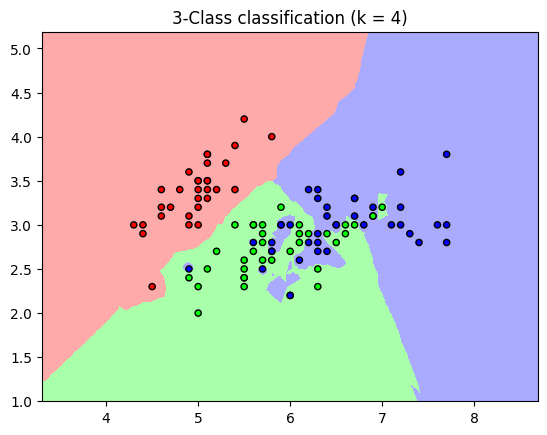

In [33]:
# k-NN 모델 생성 및 훈련
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

# 플로팅을 위한 데이터 포인트 생성
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 예측 수행
X_train_new = clf.predict(np.c_[xx.ravel(), yy.ravel()])
X_train_new = X_train_new.reshape(xx.shape)

# 결과 플로팅
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.pcolormesh(xx, yy, X_train_new, cmap=cmap_light)

# 훈련 데이터 포인트 플로팅
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


* 의사결정나무

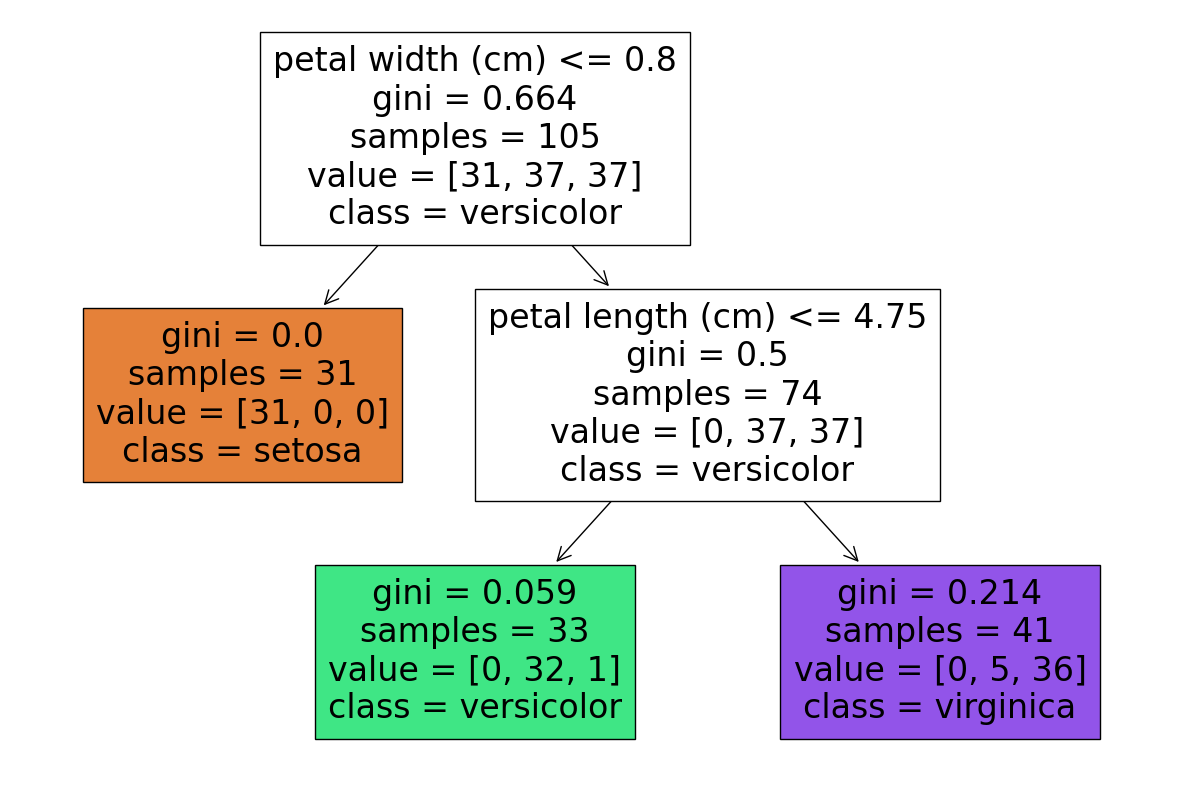

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# Fit the model to the data
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [40]:
pd.crosstab(y_test, y_pred, rownames=['y_test'], colnames=['y_pred'])

y_pred,0,1,2
y_test,,,
0,19,0,0
1,0,12,1
2,0,0,13
